### Imports and Setup

In [1]:
from herbie import Herbie, FastHerbie, wgrib2
import pandas as pd
import xarray as xr
import geojson

### Helper Functions

In [2]:
# Takes a dict of vars you want to extract, and the corresponding granularities
# Uses XARRAY accessors to limit them
def download_parameters(parameters: dict, fh: FastHerbie) -> None:
    fields = [f":{param}:{level}" for param, level in parameters.items()]
    print(fields)
    param_regex = fr"^(?:{'|'.join(fields)})"
    print(param_regex)
    return fh.download(param_regex)

# What it does
# Inputs/Parameters names and descriptions
# Returns
    

In [3]:
def parseGeoJson(geojson_path: str) -> tuple[float, float, float, float]:
    with open(geojson_path) as f:
        poly = geojson.load(f)
        bounds = list(geojson.utils.coords(poly))
        long, lat = zip(*bounds)
        return (min(long), max(long), min(lat), max(lat))

def limitGeographicRange(bounds: tuple[float, float, float, float], subsetFiles: list) -> list:
    return [wgrib2.region(f, bounds, name='skagit-basin') for f in subsetFiles]
            

### Parameter Selection

In [4]:
model = 'hrrr' # Use HRRR Model
product = 'sfc' # Use 2D surface level fields; 3-km resolution
date_range = pd.date_range(
    start="2020-03-02 00:00",
    end="2020-03-04 00:00",
    freq="1h"
)

# Parameter Names scoped from here: 
# https://www.nco.ncep.noaa.gov/pmb/products/hrrr/hrrr.t00z.wrfsfcf00.grib2.shtml
parameters = {
    'TMP' : 'surface', # Temperature - Hourly
    'RH' : '2 m above ground', # Relative Humidity - Hourly
    'WIND': '10 m above ground', # Wind Speed - 0-0 day max f 
    'APCP': 'surface', # Total Precip - 0-0 day acc f 
    'DSWRF': 'surface', # Downward Short-Wave Radiation Flux - Hourly
    'DLWRF': 'surface' # Downward Long-Wave Rad. Flux - Hourly
}

fh = FastHerbie(date_range, model=model, product=product)
fh_files = download_parameters(parameters, fh)

[':TMP:surface', ':RH:2 m above ground', ':WIND:10 m above ground', ':APCP:surface', ':DSWRF:surface', ':DLWRF:surface']
^(?::TMP:surface|:RH:2 m above ground|:WIND:10 m above ground|:APCP:surface|:DSWRF:surface|:DLWRF:surface)
👨🏻‍🏭 Created directory: [/Users/tonyzhang/data/hrrr/20200302]
👨🏻‍🏭 Created directory: [/Users/tonyzhang/data/hrrr/20200303]
👨🏻‍🏭 Created directory: [/Users/tonyzhang/data/hrrr/20200304]


In [5]:
for f in fh_files:
    wgrib2.create_inventory_file(f)
bounds = parseGeoJson('Skagit River Basin.json')
geo_limited_files = limitGeographicRange(bounds, fh_files)
geo_limited_files

[PosixPath('/Users/tonyzhang/data/hrrr/20200302/skagit-basin_subset_dcef3e52__hrrr.t00z.wrfsfcf00.grib2'),
 PosixPath('/Users/tonyzhang/data/hrrr/20200302/skagit-basin_subset_94ef3e52__hrrr.t01z.wrfsfcf00.grib2'),
 PosixPath('/Users/tonyzhang/data/hrrr/20200302/skagit-basin_subset_b3ef3e52__hrrr.t02z.wrfsfcf00.grib2'),
 PosixPath('/Users/tonyzhang/data/hrrr/20200302/skagit-basin_subset_b5ef3e52__hrrr.t03z.wrfsfcf00.grib2'),
 PosixPath('/Users/tonyzhang/data/hrrr/20200302/skagit-basin_subset_5bef3e52__hrrr.t04z.wrfsfcf00.grib2'),
 PosixPath('/Users/tonyzhang/data/hrrr/20200302/skagit-basin_subset_e1ef3e52__hrrr.t05z.wrfsfcf00.grib2'),
 PosixPath('/Users/tonyzhang/data/hrrr/20200302/skagit-basin_subset_a1ef3e52__hrrr.t06z.wrfsfcf00.grib2'),
 PosixPath('/Users/tonyzhang/data/hrrr/20200302/skagit-basin_subset_caef3e52__hrrr.t07z.wrfsfcf00.grib2'),
 PosixPath('/Users/tonyzhang/data/hrrr/20200302/skagit-basin_subset_c3ef3e52__hrrr.t08z.wrfsfcf00.grib2'),
 PosixPath('/Users/tonyzhang/data/hrr

In [6]:
# for f in geo_limited_files:
#     wgrib2.create_inventory_file(f)

import cfgrib
# skagit = xr.open_dataset(geo_limited_files[0], engine="cfgrib", filter_by_keys={'typeOfLevel': 'heightAboveGround', 'level':2})
# skagit
skagit = cfgrib.open_datasets(geo_limited_files[0])

Matplotlib is building the font cache; this may take a moment.
Ignoring index file '/Users/tonyzhang/data/hrrr/20200302/skagit-basin_subset_dcef3e52__hrrr.t00z.wrfsfcf00.grib2.9093e.idx' incompatible with GRIB file
Ignoring index file '/Users/tonyzhang/data/hrrr/20200302/skagit-basin_subset_dcef3e52__hrrr.t00z.wrfsfcf00.grib2.9093e.idx' incompatible with GRIB file
Ignoring index file '/Users/tonyzhang/data/hrrr/20200302/skagit-basin_subset_dcef3e52__hrrr.t00z.wrfsfcf00.grib2.9093e.idx' incompatible with GRIB file
Ignoring index file '/Users/tonyzhang/data/hrrr/20200302/skagit-basin_subset_dcef3e52__hrrr.t00z.wrfsfcf00.grib2.9093e.idx' incompatible with GRIB file
Ignoring index file '/Users/tonyzhang/data/hrrr/20200302/skagit-basin_subset_dcef3e52__hrrr.t00z.wrfsfcf00.grib2.9093e.idx' incompatible with GRIB file
Ignoring index file '/Users/tonyzhang/data/hrrr/20200302/skagit-basin_subset_dcef3e52__hrrr.t00z.wrfsfcf00.grib2.9093e.idx' incompatible with GRIB file


In [7]:
bounds
skagit

[<xarray.Dataset> Size: 73kB
 Dimensions:            (y: 64, x: 57)
 Coordinates:
     time               datetime64[ns] 8B 2020-03-02
     step               timedelta64[ns] 8B 00:00:00
     heightAboveGround  float64 8B 10.0
     latitude           (y, x) float64 29kB ...
     longitude          (y, x) float64 29kB ...
     valid_time         datetime64[ns] 8B ...
 Dimensions without coordinates: y, x
 Data variables:
     si10               (y, x) float32 15kB ...
 Attributes:
     GRIB_edition:            2
     GRIB_centre:             kwbc
     GRIB_centreDescription:  US National Weather Service - NCEP
     GRIB_subCentre:          0
     Conventions:             CF-1.7
     institution:             US National Weather Service - NCEP,
 <xarray.Dataset> Size: 73kB
 Dimensions:            (y: 64, x: 57)
 Coordinates:
     time               datetime64[ns] 8B 2020-03-02
     step               timedelta64[ns] 8B 00:00:00
     heightAboveGround  float64 8B 2.0
     latitude         

In [16]:
from herbie.toolbox import EasyMap, ccrs, pc
ss = r"^(?::TMP:surface|:RH:2 m above ground|:WIND:10 m above ground|:APCP:surface|:DSWRF:surface|:DLWRF:surface)"
ds = H.xarray(ss)
crs = ds.herbie.crs

NameError: name 'H' is not defined

/Users/tonyzhang/anaconda3/envs/skagit-met/lib/python3.9/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/Users/tonyzhang/anaconda3/envs/skagit-met/lib/python3.9/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_ocean.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/Users/tonyzhang/anaconda3/envs/skagit-met/lib/python3.9/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/Users/tonyzhang/anaconda3/envs/skagit-met/lib/python3.9/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_rivers_lake_centerlines.zip
  warnings.warn(f'Downl

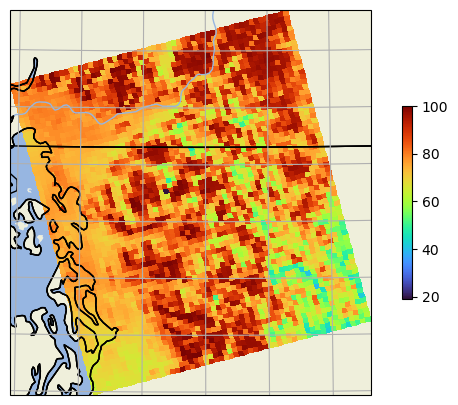

In [9]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import cartopy

skagit_surface = skagit[2]
skagit_rh = skagit[1]
# fig = plt.figure(figsize=(10, 10))
# ax = plt.axes(projection=ccrs.LambertConformal())
# ax.coastlines()
# ax.set_extent(bounds)
# plot = skagit_tmp.t.plot(
#     cmap=plt.cm.coolwarm, transform=ccrs.PlateCarree(), cbar_kwargs={"shrink": 0.5}, x="latitude", y="longitude", ax=ax
# )


skagit_surface
# skagit_tmp = skagit_tmp.isel(time=0) # strip the time dimension
# lons = skagit_surface["longitude"].to_numpy()
# lats = skagit_surface["latitude"].to_numpy()
# data = (skagit_surface["t"]-273.15).to_numpy()
lons = skagit_rh["longitude"].to_numpy()
lats = skagit_rh["latitude"].to_numpy()
data = (skagit_rh["r2"]).to_numpy()

map_proj = ccrs.LambertConformal(
    central_latitude=(bounds[2]+bounds[3])/2, 
    central_longitude=(bounds[0]+bounds[1])/2
)

fig, ax = plt.subplots(
    figsize=(8, 5), facecolor="w",
    subplot_kw=dict(projection=map_proj ),
)

cm = ax.pcolormesh(lons, lats, data, cmap='turbo', transform=ccrs.PlateCarree())
cb = fig.colorbar(cm, ax=ax, shrink=.5)
ax.coastlines()
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.STATES)
ax.add_feature(cfeature.BORDERS)
ax.gridlines()

# plt.title("TMP - Skagit")

# skagit_tmp.t.sel(longitude=bounds[0], latitude=bounds[2]).plot()

In [13]:
skagit_tmp.t.plot()

NameError: name 'skagit_tmp' is not defined

In [14]:
h.download("^(?::TMP:surface|:RH:2 m above ground|:WIND:10 m above ground|:APCP:surface|:DSWRF:surface|:DLWRF:surface)")

NameError: name 'h' is not defined

In [26]:
h.inventory("^(?::TMP:surface|:RH:2 m above ground|:WIND:10 m above ground|:APCP:surface|:DSWRF:surface|:DLWRF:surface)")

,grib_message,start_byte,end_byte,range,reference_time,valid_time,variable,level,forecast_time,search_this
63,64,34940256,36222332.0,34940256-36222332,2023-01-01,2023-01-01,TMP,surface,anl,:TMP:surface:anl
74,75,44234631,45804243.0,44234631-45804243,2023-01-01,2023-01-01,RH,2 m above ground,anl,:RH:2 m above ground:anl
78,79,50884588,52092416.0,50884588-52092416,2023-01-01,2023-01-01,WIND,10 m above ground,0-0 day max fcst,:WIND:10 m above ground:0-0 day max fcst
83,84,54442559,54442770.0,54442559-54442770,2023-01-01,2023-01-01,APCP,surface,0-0 day acc fcst,:APCP:surface:0-0 day acc fcst
122,123,85698959,86360826.0,85698959-86360826,2023-01-01,2023-01-01,DSWRF,surface,anl,:DSWRF:surface:anl
123,124,86360827,88445279.0,86360827-88445279,2023-01-01,2023-01-01,DLWRF,surface,anl,:DLWRF:surface:anl


In [6]:
myFile = fh.get_localFilePath("^(?::TMP:surface|:RH:2 m above ground|:WIND:10 m above ground|:APCP:surface|:DSWRF:surface|:DLWRF:surface)")

AttributeError: 'FastHerbie' object has no attribute 'get_localFilePath'

In [29]:
myFile

PosixPath('/Users/jesse/data/hrrr/20230101/subset_18ef59c7__hrrr.t00z.wrfsfcf00.grib2')

In [51]:
print(wgrib2.inventory('/Users/tonyzhang/data/hrrr/20200201/subset_21ef3e52__hrrr.t20z.wrfsfcf00.grib2'))

1:0:d=2020020120:TMP:surface:anl:
2:1389929:d=2020020120:RH:2 m above ground:anl:
3:2891449:d=2020020120:WIND:10 m above ground:0-0 day max fcst:
4:4049386:d=2020020120:APCP:surface:0-0 day acc fcst:
5:4049598:d=2020020120:DSWRF:surface:anl:
6:6202818:d=2020020120:DLWRF:surface:anl:



In [54]:
idx_file = wgrib2.create_inventory_file('/Users/tonyzhang/data/hrrr/20200201/subset_21ef3e52__hrrr.t20z.wrfsfcf00.grib2')
idx_file, idx_file.exists()
pd.read_csv(idx_file, delimiter=":", header=None)

,0,1,2,3,4,5,6
0,1,0,d=2020020120,TMP,surface,anl,NaN
1,2,1389929,d=2020020120,RH,2 m above ground,anl,NaN
2,3,2891449,d=2020020120,WIND,10 m above ground,0-0 day max fcst,NaN
3,4,4049386,d=2020020120,APCP,surface,0-0 day acc fcst,NaN
4,5,4049598,d=2020020120,DSWRF,surface,anl,NaN
5,6,6202818,d=2020020120,DLWRF,surface,anl,NaN


In [55]:
skagit_bounds = limit_geographic_range("skagit_boundaries.json")
subset_file = wgrib2.region('/Users/tonyzhang/data/hrrr/20200201/subset_21ef3e52__hrrr.t20z.wrfsfcf00.grib2', skagit_bounds, name="skagit-basin")
subset_file

PosixPath('/Users/jesse/data/hrrr/20200201/skagit-basin_subset_21ef3e52__hrrr.t20z.wrfsfcf00.grib2')

In [71]:
skagit_bounds

(-123.409663, -118.092281, 47.543471, 50.06801)

In [56]:
pd.read_csv(str(subset_file) + ".idx", delimiter=":", header=None)

,0,1,2,3,4,5,6
0,1,0,d=2020020120,TMP,surface,anl,NaN
1,2,18021,d=2020020120,RH,2 m above ground,anl,NaN
2,3,40324,d=2020020120,WIND,10 m above ground,0-0 day max fcst,NaN
3,4,59179,d=2020020120,APCP,surface,0-0 day acc fcst,NaN
4,5,59422,d=2020020120,DSWRF,surface,anl,NaN
5,6,90037,d=2020020120,DLWRF,surface,anl,NaN


In [60]:
# ds_region = xr.open_dataset(subset_file, engine="cfgrib", backend_kwargs={'errors': 'ignore'})
import cfgrib
ds_region = cfgrib.open_datasets(subset_file)

Ignoring index file '/Users/jesse/data/hrrr/20200201/skagit-basin_subset_21ef3e52__hrrr.t20z.wrfsfcf00.grib2.9093e.idx' incompatible with GRIB file


In [61]:
ds_region

[<xarray.Dataset> Size: 375kB
 Dimensions:            (y: 124, x: 151)
 Coordinates:
     time               datetime64[ns] 8B 2020-02-01T20:00:00
     step               timedelta64[ns] 8B 00:00:00
     heightAboveGround  float64 8B 10.0
     latitude           (y, x) float64 150kB ...
     longitude          (y, x) float64 150kB ...
     valid_time         datetime64[ns] 8B ...
 Dimensions without coordinates: y, x
 Data variables:
     si10               (y, x) float32 75kB ...
 Attributes:
     GRIB_edition:            2
     GRIB_centre:             kwbc
     GRIB_centreDescription:  US National Weather Service - NCEP
     GRIB_subCentre:          0
     Conventions:             CF-1.7
     institution:             US National Weather Service - NCEP,
 <xarray.Dataset> Size: 375kB
 Dimensions:            (y: 124, x: 151)
 Coordinates:
     time               datetime64[ns] 8B 2020-02-01T20:00:00
     step               timedelta64[ns] 8B 00:00:00
     heightAboveGround  float64 8B 

In [65]:
from herbie import Herbie
from herbie.toolbox import EasyMap, pc, ccrs

import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'herbie.toolbox'